In [3]:
import keras
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
import keras.datasets.mnist as mnist

In [5]:
(train_image, train_label),(test_image,test_label) = mnist.load_data()

11493376/11490434 [==============================] - 524s 46us/step


In [6]:
train_image.shape

(60000, 28, 28)

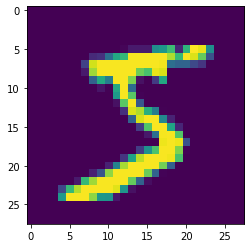

In [7]:
plt.imshow(train_image[0])

In [8]:
train_label.shape

(60000,)

In [9]:
test_image.shape,test_label.shape

((10000, 28, 28), (10000,))

In [10]:
# 顺序模型
model = keras.Sequential()
# (60000,28,28)--> (60000, 28*28)
model.add(layers.Flatten())
# 全连接层
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [11]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['acc'])

In [12]:
model.fit(train_image, train_label, epochs = 50, batch_size = 512)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





60000/60000 [==============================] - 11s 177us/step - loss: 5.8906 - acc: 0.6250
Epoch 2/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.9871 - acc: 0.8086
Epoch 3/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.6414 - acc: 0.8309
Epoch 4/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.4868 - acc: 0.8415
Epoch 5/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.4395 - acc: 0.8448
Epoch 6/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.3532 - acc: 0.8504
Epoch 7/50
60000/60000 [==============================] - 1s 14us/step - loss: 2.3072 - acc: 0.8535: 0s - loss: 2.2559 -
Epoch 8/50
60000/60000 [==============================] - 1s 13us/step - loss: 2.2720 - acc: 0.8559
Epoch 9/50
60000/60000 [==============================] - 1s 14us/step -

In [19]:
model.evaluate(test_image, test_label)

10000/10000 [==============================] - 1s 88us/step


[0.5225099971218286, 0.9659]

In [20]:
model.evaluate(train_image, train_label)

60000/60000 [==============================] - 4s 63us/step


[0.3641383859386498, 0.9760166666666666]

In [13]:
import numpy as pd

In [14]:
model.predict(test_image[:10])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
np.argmax(model.predict(test_image[:10]), axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [17]:
test_label[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

# 模型的优化

In [21]:
# 顺序模型
model = keras.Sequential()
# (60000,28,28)--> (60000, 28*28)
model.add(layers.Flatten())
# 全连接层
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [22]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['acc'])

In [26]:
model.fit(train_image, train_label, epochs = 50, batch_size = 512,validation_data = (test_image,test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 24us/step - loss: 7.6795 - acc: 0.5148 - val_loss: 6.9986 - val_acc: 0.5604
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 6.6373 - acc: 0.5829 - val_loss: 5.6573 - val_acc: 0.6420
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 4.8150 - acc: 0.6946 - val_loss: 4.0782 - val_acc: 0.7417
Epoch 4/50
60000/60000 [==============================] - 1s 16us/step - loss: 3.9240 - acc: 0.7516 - val_loss: 3.8283 - val_acc: 0.7583
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 3.8160 - acc: 0.7583 - val_loss: 3.8240 - val_acc: 0.7582
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 3.7233 - acc: 0.7653 - val_loss: 3.7480 - val_acc: 0.7641
Epoch 7/50
60000/60000 [==============================] - 1s 15us/step - loss: 3.6631 - acc: 0.7690 - val_loss: 3.7454 - val_acc